<a href="https://colab.research.google.com/github/AvniKal/HousePricePrediction-ak/blob/master/HousingCostPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Housing.csv")

In [ ]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[cols]=df[cols].replace({'yes':1,'no':0})
df['furnishingstatus']=df['furnishingstatus'].replace({'furnished':1,'unfurnished':0,'semi-furnished':0.5})

/tmp/ipython-input-2061074360.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols]=df[cols].replace({'yes':1,'no':0})
/tmp/ipython-input-2061074360.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus']=df['furnishingstatus'].replace({'furnished':1,'unfurnished':0,'semi-furnished':0.5})


In [ ]:
#calculate correlation matrix
corr_matrix=df.corr()

In [ ]:
# Extract correlations with 'price'
price_corr=corr_matrix['price'].sort_values(ascending=False)

In [ ]:
min_val = price_corr.values.min()
max_val = price_corr.values.max()
normalized_values = (price_corr.values - min_val) / (max_val - min_val)

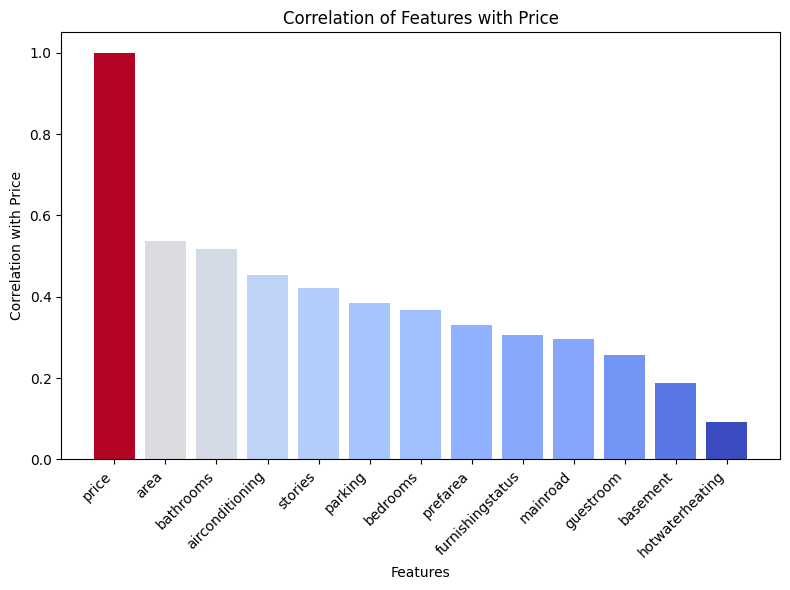

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(price_corr.index, price_corr.values,color= plt.cm.coolwarm(normalized_values))
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Correlation with Price")
plt.title("Correlation of Features with Price")
plt.tight_layout()
plt.show()

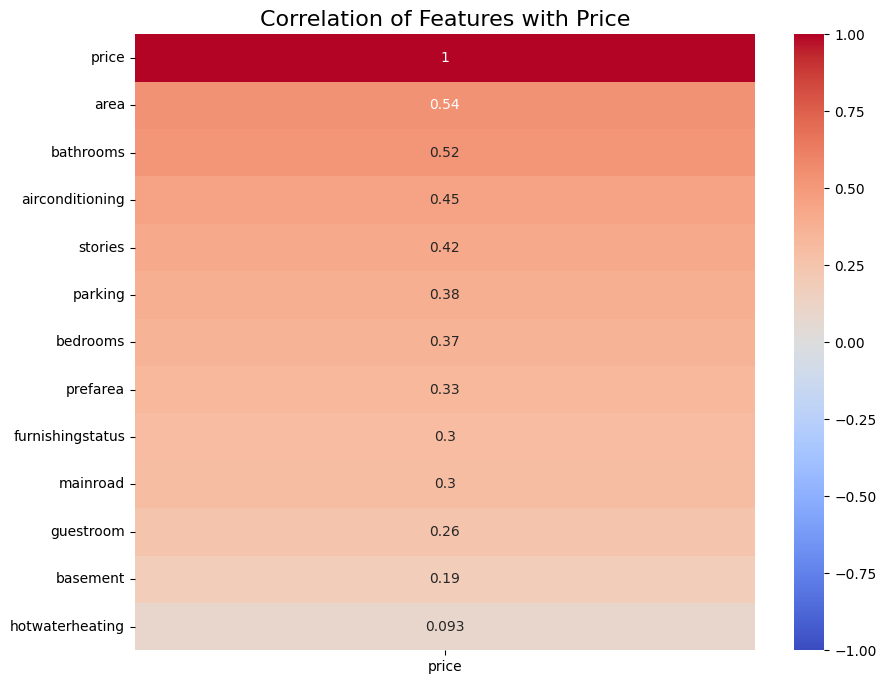

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix[['price']].sort_values(by='price', ascending=False),
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)
plt.title('Correlation of Features with Price', fontsize=16)
plt.show()

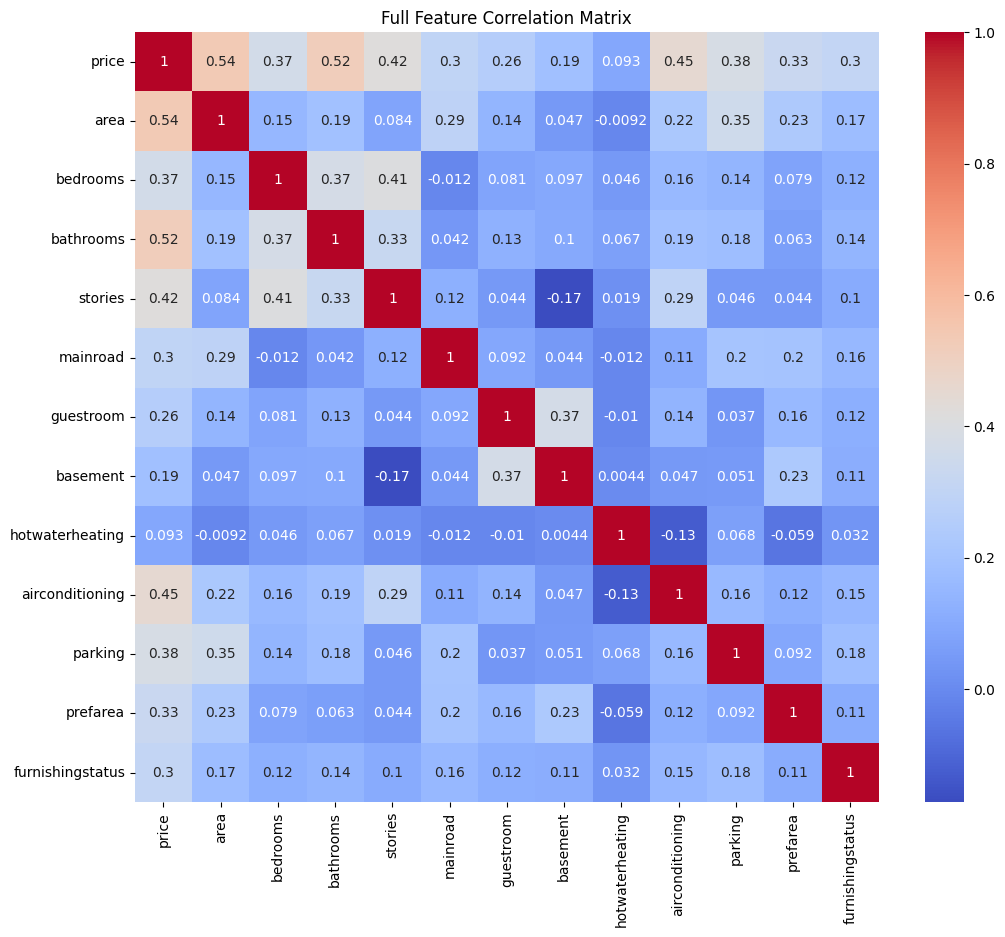

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Full Feature Correlation Matrix")
plt.show()

use of box plot for outliers
Detect outliers → You can instantly see values that are unusually high or low.
See spread → Understand how “wide” the data is.
Compare distributions → Multiple box plots side-by-side show differences between categories.
Check symmetry → If median is centered and whiskers are similar length, distribution is symmetric.
Spot skewness → If one whisker is longer, data is skewed in that direction.

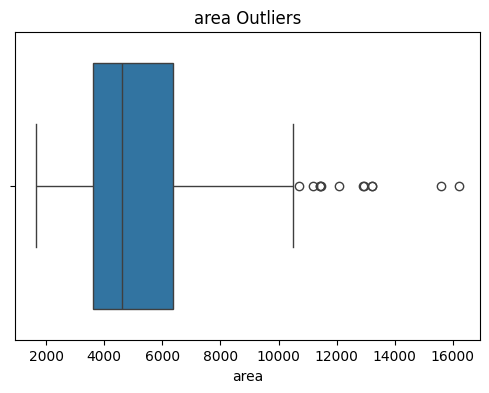

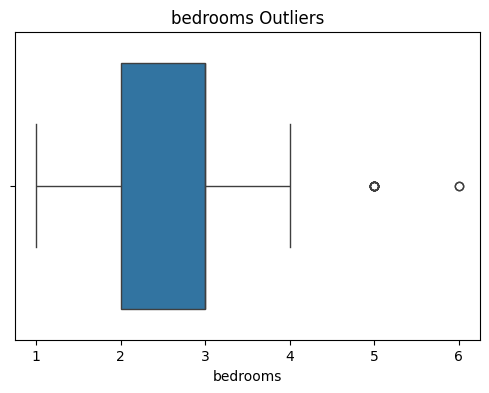

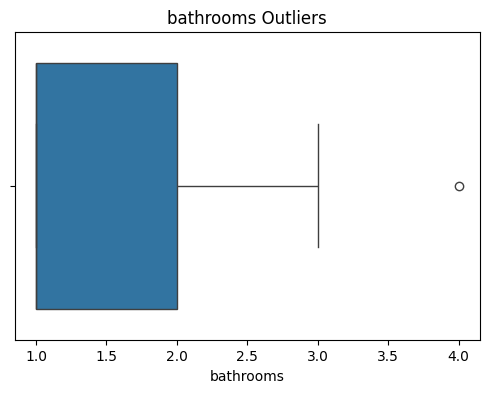

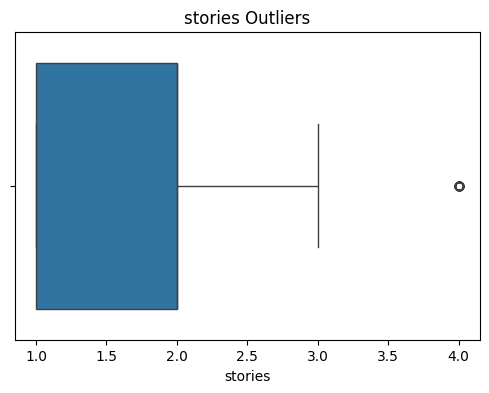

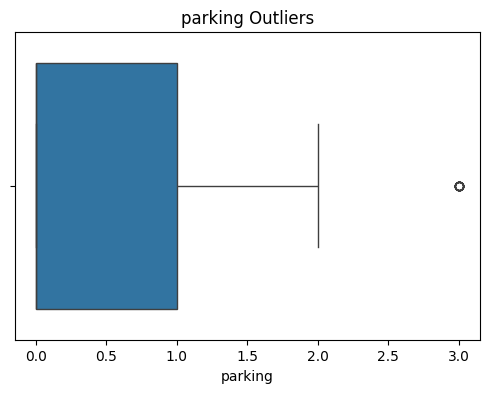

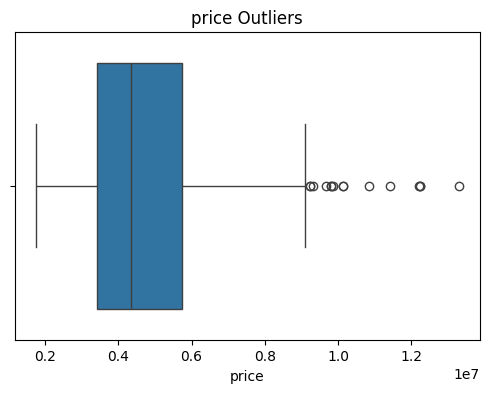

In [ ]:
# outliers detection and treatment
cols=['area','bedrooms','bathrooms','stories','parking','price']
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Outliers")
    plt.show()

In [ ]:
# remove outliers from price
# Outliers in the target hurt the model more
# If you blindly remove outliers from every column, you risk losing:
# Valuable rare cases (luxury homes, small cottages)

price_mean = df['price'].mean()
price_std = df['price'].std()
lower_bound = price_mean - 3 * price_std
upper_bound = price_mean + 3 * price_std
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Feature engineering is the process of transforming raw data into meaningful features that make machine learning models work better.
Well-crafted features can boost accuracy more than simply using a fancy algorithm.

In [ ]:
#Feature Engineering
df['price_per_sqft'] = df['price'] / df['area']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']+ df['guestroom']

Scaling features means adjusting the range of your numerical features so they’re on a similar scale.
Many ML models (e.g., Linear Regression, KNN, SVM, Neural Networks) work better when features have similar ranges.
Scaling doesn’t change relationships between data points — it just changes the units.

In [ ]:
# scalling features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_cols = ['area', 'price_per_sqft', 'total_rooms']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,total_rooms
6,10150000,1.607004,4,3,4,1,0,0,0,1,2,1,0.5,0.568685,2.285162
7,10150000,5.143483,5,3,2,1,0,0,0,0,0,0,0.0,-1.051574,3.167470
8,9870000,1.384234,4,1,2,1,1,1,0,1,2,1,1.0,0.672156,1.402854
9,9800000,0.293587,3,2,4,1,1,0,0,1,1,1,0.0,2.086808,1.402854
10,9800000,3.751168,3,1,2,1,0,1,0,1,2,1,1.0,-0.714148,-0.361763


In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('price',axis=1)
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train[:5]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,total_rooms
467,-0.871316,3,1,2,1,0,0,0,0,2,0,0.5,-0.170836,-0.361763
237,-0.049850,3,1,2,1,0,1,0,0,0,0,0.5,-0.190801,-0.361763
452,1.801928,3,1,2,1,0,0,0,0,2,0,0.5,-1.856820,-0.361763
455,0.175240,3,1,1,1,0,1,0,0,0,0,0.0,-1.217887,-0.361763
454,-0.286544,3,1,2,1,0,0,0,1,0,0,0.0,-0.842210,-0.361763


making my own class(multiple regression)

In [ ]:
class multi_reg():

  def __init__(self):
    self.intercept=None
    self.coeff=None

  def fit(self,X_train,y_train):
    X_train=np.insert(X_train,0,1,axis=1)  # insert 1 in first column so that multply hoke betaNot mil jaay

    # calculate coeff
    betas=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    self.intercept = betas[0]
    self.coeff = betas[1:]

  def predict(self,X_test):
    y_pred=self.intercept + np.dot(X_test,self.coeff)
    return y_pred

In [ ]:
ml=multi_reg()   #object created of class

In [ ]:
ml.fit(X_train,y_train)

In [ ]:
y_pred=ml.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8208083908069923
622078.6915056638
687156462354.914


use pre-defined class

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8702610060061972
501752.09186197666
497517649089.4852


In [ ]:
# model interpretation
coef_df = pd.DataFrame({
    "Feature": X_train.columns,  #gets the names of your input features
    "Coefficient": reg.coef_,    #the weights that Linear Regression assigns to each feature after training.
})
print(f"Intercept: {reg.intercept_}")   #This is the base predicted price when all features are zero

Intercept: 4050163.967994432


In [ ]:
print(coef_df.sort_values(by="Coefficient", ascending=False)) # Arranges features from highest → lowest coefficient.
 # Lets us quickly see which features increase the price the most (top rows) and which decrease it the most (bottom rows).

             Feature   Coefficient
0               area  1.220243e+06
12    price_per_sqft  1.091648e+06
8    airconditioning  4.570227e+05
4           mainroad  3.781739e+05
2          bathrooms  2.899137e+05
13       total_rooms  2.140309e+05
10          prefarea  1.921559e+05
7    hotwaterheating  1.755760e+05
5          guestroom  1.751101e+05
3            stories  1.698706e+05
9            parking  7.727000e+04
11  furnishingstatus  2.782335e+04
6           basement -4.282666e+04
1           bedrooms -2.224431e+05


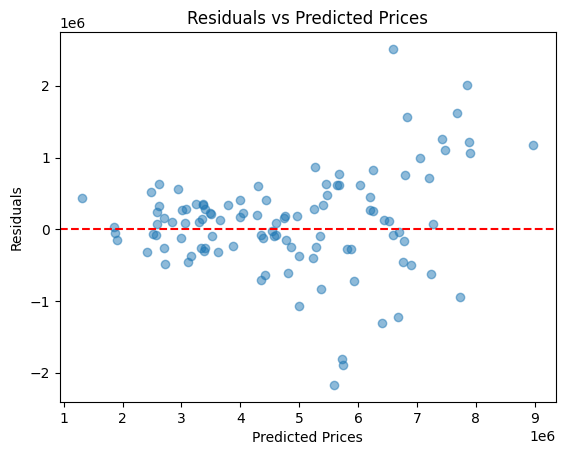

In [ ]:
# residual scatter plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)  #aplha makes points semi-transparent
plt.axhline(y=0, color='r', linestyle='--')  #horizontal dashed line at residual 0
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()

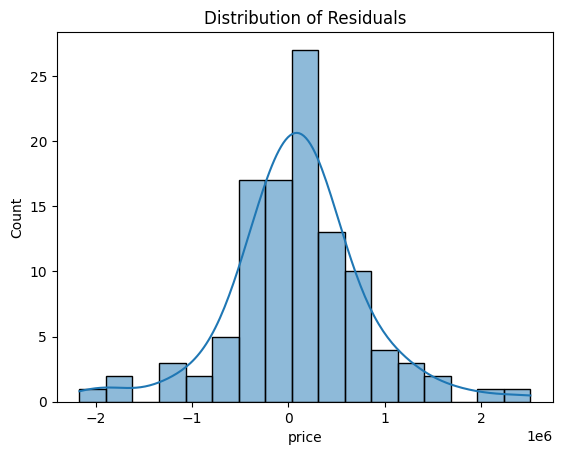

In [ ]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

In [ ]:
new_req=pd.DataFrame({
    'area':[7420],
    'bedrooms':[4],
    'bathrooms':[2],
    'stories':[3],
    'mainroad':[1],
    'guestroom':[0],
    'basement':[0],
    'hotwaterheating':[0],
    'airconditioning':[1],
    'parking':[2],
    'prefarea':[1],
    'furnishingstatus':[1],
    'price_per_sqft':[1729],
    'total_rooms':[6],
})

In [ ]:
price=reg.predict(new_req)

In [ ]:
print(price)

[1.09484078e+10]
